### Final Project Submission

Please fill out:
* Student name: Cristina Townsend
* Student pace: part time 
* Scheduled project review date/time: Wednesday 08/12/2020 at 16:00
* Instructor name: James Irving
* Blog post URL:
* Presentation URL: https://docs.google.com/presentation/d/1V97mN3zDtDcKiJJ6MrYXO1FuYYEwQeSSoTMuaXWYeo4/edit?pli=1#slide=id.p


#### Business Case
In this notebook, we'll explore, and model King County House Sale dataset with a multivariate linear regression to predict the sale price of houses by answering the following questions:
- What are some of the important aspects when it comes to pricing your home for sale?
- Which things are not as important when trying to sell your home?
- How can we improve the potential sale price of your home?




## Obtaining the Data

In [1]:
import pandas as pd

In [2]:
# import data and ensure it loaded in properly
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** -  price prediction target
* **bedrooms** -  number of Bedrooms in the House
* **bathrooms** -  number of bathrooms
* **sqft_living** -  square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** -  total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **yrs_since_reno** - Number of years since renovated, if not renovated years since built
* **zipcode** - zip
* **subregion** - the subregion that the zipcode falls under
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Initial examination of data

In [3]:
# See if there is anything that stands outs that we will need to deal with in
# scrubbing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# See if there are any unusual max/mins which would give us an idea if there 
# are place holder values
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Initial Scrubbing

### Looking at individual columns

#### id

In [5]:
# Drop, since will not add any useful information to the model
df.drop(columns=['id'],axis=1, inplace=True)

#### Date

In [6]:
# Change to date-time
df['date'] = pd.to_datetime(df['date'])
df['date'].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

#### Price

In [7]:
# What we will be running the model against
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

#### Bedroom and Bathroom number

In [8]:
# Looking at Bedrooms to make sure there aren't any hidden nulls or place holders
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [9]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [10]:
df.drop(df[df['bedrooms'] == 33 ].index , inplace=True)

In [11]:
# Looking at bathrooms to make sure there aren't any hidden nulls or place holders
df['bathrooms'].describe()

count    21596.000000
mean         2.115843
std          0.768998
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [12]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

#### sqft_living, sqft_lots, floors

In [13]:
# Looking at sqft_living to make sure there aren't any hidden nulls or place holders
print(df['sqft_living'].describe())
print('Null values:', df['sqft_living'].isnull().sum())

count    21596.000000
mean      2080.343165
std        918.122038
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
Null values: 0


In [14]:
# Looking at sqft_lot to make sure there aren't any hidden nulls or place holders
print(df['sqft_lot'].describe())
print('Null values:', df['sqft_lot'].isnull().sum())

count    2.159600e+04
mean     1.509983e+04
std      4.141355e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.619000e+03
75%      1.068550e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64
Null values: 0


In [15]:
# Looking at sqft_lot to make sure there aren't any hidden nulls or place holders
print(df['floors'].describe())
print('Null values:', df['floors'].isnull().sum())

count    21596.000000
mean         1.494119
std          0.539685
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64
Null values: 0


#### Waterfront

In [16]:
# Check for null values
df['waterfront'].unique()

array([nan,  0.,  1.])

In [17]:
# Assume that if it isn't reported, it does not have a waterfront view
df['waterfront'] = df['waterfront'].fillna(0)

In [18]:
# check again to ensure no nulls
print('Null values:', df['waterfront'].isnull().sum())

Null values: 0


#### View, Condition, and Grade

In [19]:
# Check for null and place holders
print('Null values:', df['view'].isnull().sum())
df['view'].unique()

Null values: 63


array([ 0., nan,  3.,  4.,  2.,  1.])

In [20]:
# Replace null with 0
df['view'] = df['view'].fillna(0)

In [21]:
# check again to ensure no nulls
print('Null values:', df['view'].isnull().sum())
df['view'].unique()

Null values: 0


array([0., 3., 4., 2., 1.])

In [22]:
# Check for null and place holders
print('Null values:', df['condition'].isnull().sum())
df['condition'].unique()

Null values: 0


array([3, 5, 4, 1, 2])

In [23]:
# Check for null and place holders
print('Null values:', df['grade'].isnull().sum())
df['grade'].unique()

Null values: 0


array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

#### sqft_above and sqft_basement

In [24]:
# Check for null and place holders
print('Null values:', df['sqft_above'].isnull().sum())
df['sqft_above'].describe()

Null values: 0


count    21596.000000
mean      1788.631506
std        827.763251
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [25]:
# Check for nulls and place holders
print('Null values:', df['sqft_basement'].isnull().sum())
df['sqft_basement'].describe()

Null values: 0


count     21596
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [26]:
# There was an error when attempted to convert to float, so we know there is a place holder '?'

In [27]:
# We know sqft_living and sqft_above do not have any null or place holders so if we 
# subtract them, we should get the sqft_basement for all properties
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [28]:
# Check to ensure it worked
print('Null values:', df['sqft_basement'].isnull().sum())
df['sqft_basement'].describe()

Null values: 0


count    21596.000000
mean       291.711660
std        442.673703
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

#### Year Built

In [29]:
# Check for nulls and place holders
print('Null values:', df['yr_built'].isnull().sum())
df['yr_built'].describe()

Null values: 0


count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

#### Year Renovated

In [30]:
# Check for nulls and place holders
print('Null values:', df['yr_renovated'].isnull().sum())
df['yr_renovated'].describe()

Null values: 3842


count    17754.000000
mean        83.641489
std        399.957185
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [31]:
# Fill the null values with zeroes
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [32]:
# Check for nulls again
print('Null values:', df['yr_renovated'].isnull().sum())

Null values: 0


In [33]:
# create a temp column to calculate years since renovation
df['temp'] = df['yr_renovated'].replace(to_replace=0, value=df['yr_built'])


In [34]:
# Calculate years since the house had work done on it
df['yrs_since_reno'] = 2020 - df['temp']
df['yrs_since_reno']

0        65.0
1        29.0
2        87.0
3        55.0
4        33.0
         ... 
21592    11.0
21593     6.0
21594    11.0
21595    16.0
21596    12.0
Name: yrs_since_reno, Length: 21596, dtype: float64

In [35]:
# Drop temp
df.drop(columns=['temp'],axis=1, inplace=True)

#### Drop Lat/long


In [36]:
df.drop(columns=['lat','long'],axis=1, inplace=True)

In [37]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'yrs_since_reno'],
      dtype='object')

#### Zipecodes

In [38]:
subregion_dict = {'south_urban': [98001, 98002, 98003, 98023, 98030, 98031, 98032, 98042, 
                                 98055, 98056, 98058, 98092, 98148, 98166, 98168, 98178, 98188,
                                 98198], 
                 'east_urban' : [98004, 98005, 98006, 98007, 98008, 98009, 98027, 98029, 
                                 98033, 98034, 98039, 98040, 98052, 98053, 98059, 98074, 
                                98075, 98077],
                 'south_rural' : [98010, 98022, 98038],
                 'north' : [98011, 98028, 98072, 98155],
                 'east_rural' : [98014, 98019, 98024, 98045, 98065],
                 'vashon_island' : [98070], 
                 'seattle' : [98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
                             98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136, 98144, 98199], 
                 'north_and_seattle' : [98133, 98177], 
                 'south_and_seattle' : [98146]}

In [39]:
def get_key(val): 
    for key, value in subregion_dict.items(): 
         if val in value: 
            return key 

In [40]:
region_lst = []
for x in df['zipcode']:
    region_lst.append(get_key(x))

df['subregion'] = region_lst
df['subregion']    

0              south_urban
1                  seattle
2                    north
3                  seattle
4               east_urban
               ...        
21592              seattle
21593    south_and_seattle
21594              seattle
21595           east_urban
21596              seattle
Name: subregion, Length: 21596, dtype: object

In [41]:
df.drop('zipcode', axis=1, inplace=True)
df3 = df.copy()

#### Convert columns into objects

In [42]:
col_to_obj = ['view', 'condition']

In [43]:
for x in col_to_obj:
    df[x] = df[x].astype(str)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
date              21596 non-null datetime64[ns]
price             21596 non-null float64
bedrooms          21596 non-null int64
bathrooms         21596 non-null float64
sqft_living       21596 non-null int64
sqft_lot          21596 non-null int64
floors            21596 non-null float64
waterfront        21596 non-null float64
view              21596 non-null object
condition         21596 non-null object
grade             21596 non-null int64
sqft_above        21596 non-null int64
sqft_basement     21596 non-null int64
yr_built          21596 non-null int64
yr_renovated      21596 non-null float64
sqft_living15     21596 non-null int64
sqft_lot15        21596 non-null int64
yrs_since_reno    21596 non-null float64
subregion         21596 non-null object
dtypes: datetime64[ns](1), float64(6), int64(9), object(3)
memory usage: 3.9+ MB


### One-Hot Encoding Categorical Columns

In [45]:
feats = ['view','condition','grade','subregion']

df = pd.get_dummies(df, drop_first=True)

In [46]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,condition_4,condition_5,subregion_east_urban,subregion_north,subregion_north_and_seattle,subregion_seattle,subregion_south_and_seattle,subregion_south_rural,subregion_south_urban,subregion_vashon_island
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,7,1180,...,0,0,0,0,0,0,0,0,1,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,7,2170,...,0,0,0,0,0,1,0,0,0,0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,6,770,...,0,0,0,1,0,0,0,0,0,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,7,1050,...,0,1,0,0,0,1,0,0,0,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,8,1680,...,0,0,1,0,0,0,0,0,0,0


## Exploring the Data

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import six
%matplotlib inline

In [48]:
# Quick look at the details of the dataset
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,condition_4,condition_5,subregion_east_urban,subregion_north,subregion_north_and_seattle,subregion_seattle,subregion_south_and_seattle,subregion_south_rural,subregion_south_urban,subregion_vashon_island
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,...,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,7.657946,1788.631506,291.711660,...,0.262873,0.078718,0.272828,0.055427,0.034636,0.288572,0.013336,0.042693,0.244397,0.005418
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,1.173218,827.763251,442.673703,...,0.440204,0.269305,0.445424,0.228817,0.182860,0.453109,0.114711,0.202169,0.429739,0.073407
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,3.000000,370.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,13.000000,9410.000000,4820.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


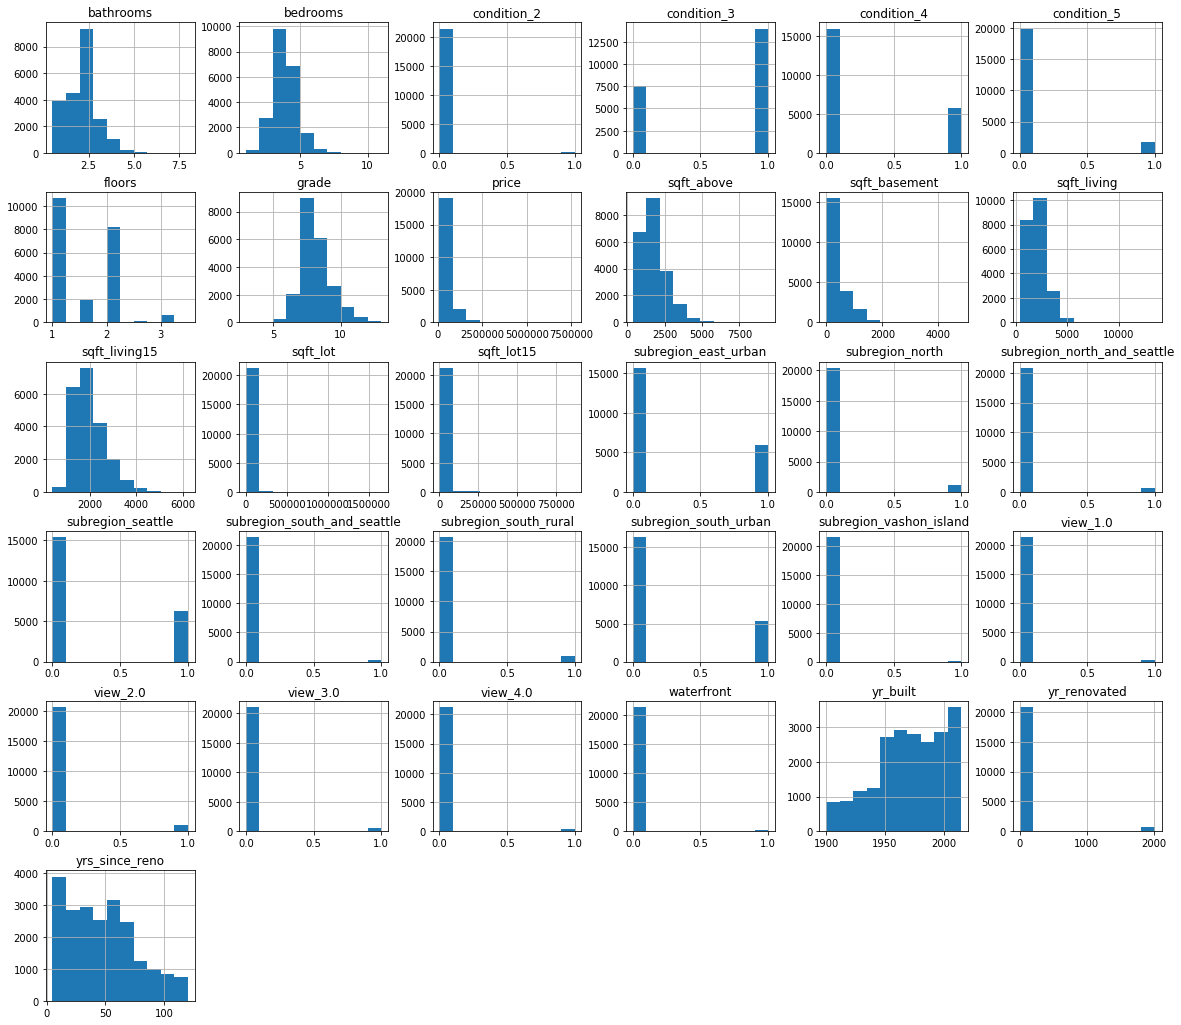

In [49]:
# Histogram of the dataset
df.hist(figsize = (20,18))
plt.savefig('Figures/df_hist.png', dpi=300, bbox_inches='tight');

### Joint plots
Looking at joint plots to see which variables

In [50]:
import scipy.stats as stats

/Users/Crisitna/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


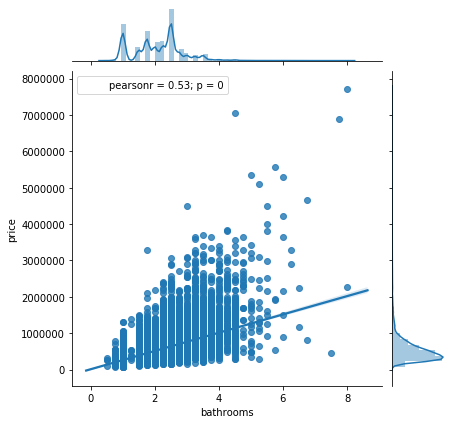

<Figure size 432x288 with 0 Axes>

In [51]:
sns.jointplot('bathrooms','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show()

plt.savefig('Figures/joint_example.png', dpi=300, bbox_inches='tight');

In [ ]:
sns.jointplot('bedrooms','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('floors','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('grade','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('sqft_above','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('sqft_living','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('sqft_lot','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('sqft_living15','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('sqft_lot15','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('yr_built','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('yr_renovated','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

In [ ]:
sns.jointplot('yrs_since_reno','price', data=df, kind='reg').annotate(stats.pearsonr)
plt.show();

### Heatmap

In [ ]:
# Create a heatmap to see if there is danage of multicorrelation
feats = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
         'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
         'sqft_living15', 'sqft_lot15', 'yrs_since_reno']
corr = df[feats].corr()
corr

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

plt.savefig('Figures/heatmap_1.png', dpi=300, bbox_inches='tight');

### Removing Outliers

In [ ]:
# Create boxplot to see what outliers there may be
sns.boxplot(x=df['price'])
plt.savefig('Figures/boxplot_outliers.png', dpi=300, bbox_inches='tight');

In [ ]:
# Find the iqr
from scipy.stats import iqr
data = df['price']
iqr = iqr(data, axis=0)

In [ ]:
# define lower outliers
lower_outliers = (df['price'].median() - 1.5 * iqr)
lower_outliers

In [ ]:
# define upper outliers
upper_outliers = (df['price'].median() + 1.5 * iqr)
upper_outliers

In [ ]:
# drop upper outliers, there aren't any lower outliers 
df.drop(df[ df['price'] >= upper_outliers ].index , inplace=True)

In [ ]:
# Take another look at the boxplot and describe
print(df['price'].describe())
sns.boxplot(x=df['price'])

plt.savefig('Figures/boxplot_noliers.png', dpi=300, bbox_inches='tight');

In [ ]:
df2 = df.copy()

## Initial Modeling the Data

In [ ]:
# Define the problem
outcome = 'price'
x_cols = list(df2.columns)
x_cols.remove(outcome)
x_cols.remove('date')
[x_cols.remove(col) for col in df2.columns if "view" in col]
x_cols

In [ ]:
# Some brief preprocessing
df2.columns = [col.replace(' ', '_') for col in df2.columns]
for col in x_cols:
    df2[col] = (df2[col] - df2[col].mean())/df2[col].std()
df2.head()

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df2).fit()
model.summary()

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
# Run a qq Test
plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

## Model 2

In [ ]:
# create a list of all p-values
p_values = model.pvalues

In [ ]:
# Create a list of p-values that weren't significant
remove_col = list(p_values[p_values > 0.05].index)

In [ ]:
# Check the column that will be removed due to p-values
remove_col

In [ ]:
# Remove those columns for the seoncd model
x_cols2 = x_cols.copy()
[x_cols2.remove(col) for col in remove_col if col in x_cols2]
x_cols2

In [ ]:
# Create a heatmap to see if there is danage of multicorrelation so examine
# heat map again to remove any with high correlation
feats = x_cols2.copy()
corr = df[feats].corr()
corr

In [ ]:
# There is still some high correlation
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, center=0, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

plt.savefig('Figures/heatmap_2.png', dpi=300, bbox_inches='tight');

In [ ]:
# columns with greater than .65
remove_col2 = ['sqft_above', 'condition_4']

In [ ]:
# remove those columns
outcome = 'price'
[x_cols2.remove(col) for col in remove_col2 if col in x_cols2]
x_cols2

In [ ]:
# Run the second model
predictors = '+'.join(x_cols2)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=df2).fit()
model2.summary()

The likely hood multicollinearity dropped.

### Train Test Split

In [ ]:
# Import model validation functions
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Create a training and test set
df_train, df_test = train_test_split(df2,test_size=0.20,shuffle=True,
                                     random_state=420)
df_train.shape, df_test.shape

In [ ]:
## Train Model using the training data 
model3 = smf.ols(formula=formula, data=df_train).fit()

In [ ]:
# Get Model Predictions and Calculate Training R2
r2_train = r2_score(df_train['price'],model3.predict(df_train))
print(f'Training Data R-Squared = {round(r2_train,3)}')

# Get Model Predictions and Calculate Training R2
r2_test = r2_score(df_test['price'],model3.predict(df_test))
print(f'Training Data R-Squared = {round(r2_test,3)}')

#Display model summary
# model3.summary()

## Interpretations and presentation figures

### Bedrooms and Bathrooms

In [ ]:
# Set context to look better on a presentation
sns.set_context("talk")
sns.set_style('dark')

In [ ]:
# Graph Price per Bedrooms
fig, axs = plt.subplots(figsize=(24,10), ncols=2)

bed_line = sns.regplot(x=df['bedrooms'], y=df['price'],data=df, ax=axs[0])
bed_line.set_title('Price per Bedrooms')

bed_box = sns.boxplot(x=df['bedrooms'], y=df['price'],data=df, showfliers=False, ax=axs[1])
bed_box.set_title('Price per Bedrooms')

# Save plot as png
plt.savefig('Figures/bedrooms_subplots.png', transparent=True);

In [ ]:
fig, axs = plt.subplots(figsize=(24,10), ncols=2)

bath_line = sns.regplot(x=df['bathrooms'], y=df['price'],data=df, ax=axs[0])
bath_line.set_title('Price per Bathrooms')

bath_box = sns.boxplot(x=df['bathrooms'], y=df['price'],data=df, showfliers=False, ax=axs[1])
bath_box.set_title('Price per Bathrooms')

# Save plot as png
plt.savefig('figures/bathrooms_subplots.png', transparent=True);

#### Interpretation:
- In general, number of bathrooms and bedrooms relate to price of house.
- More bedrooms and bathrooms, the more the house goes for.

### Grade

In [ ]:
fig, axs = plt.subplots(figsize=(24,10), ncols=2)

grade_line = sns.regplot(x=df['grade'], y=df['price'],data=df, ax=axs[0])
grade_line.set_title('Price per Kings County Grade')

grade_box = sns.boxplot(x=df['grade'], y=df['price'],data=df, showfliers=False, ax=axs[1])
grade_box.set_title('Price per Kings County Grade')

# Save plot as png
plt.savefig('Figures/grade_subplots.png', transparent=True);

#### Interpretation
- The higher the grade, the high the sales price.

In [ ]:
sqft_line = sns.regplot(x=df['sqft_living'], y=df['price'],data=df)
sqft_line.set_title('Price per Living Space (sqft)')
sqft_line.set_xlabel('Living Space (in sqft)')
sqft_line.set_ylabel('Price')


# Save plot as png
plt.savefig('Figures/sqft_living_subplots.png', transparent=True);

### Subregion Boxplot

In [ ]:
# Create subregion list
subregion_list = []
for x in df.columns:
    if 'subregion' in x:
        subregion_list.append(x)

In [ ]:
subregion_list

In [ ]:
# Def to create a column with subregions for boxplot
def get_region(row):
    for c in subregion_list:
        if row[c]==1:
            return c

In [ ]:
df['region'] = df.apply(get_region, axis=1)

In [ ]:
# Create dict of subregions and price
region_dict = {}
for x in subregion_list:

    try:
        temp = df.groupby(x).get_group(True)['price']
        region_dict[x] = temp.reset_index()
    except:
        print(x)
# region_dict

In [ ]:
# Create Dictionary without a Dataframe in it
region_dict2 = {}
for x in subregion_list:
    region_dict2[x] = region_dict[x]['price']
# region_dict2['subregion_east_urban']

In [ ]:
# Create a DataFrame of subregions and price for a boxplot
df_region = pd.DataFrame.from_dict(region_dict2)
df_region.head()

In [ ]:
region_box = sns.boxplot(data=df_region, showfliers=False)
region_box.set_xticklabels(subregion_list, rotation=45, ha='right')
region_box.set_title('Sale Price per Subregion (Without Outliers)')
region_box.set_xticklabels(df_region, rotation=45, ha='right')
region_box.set_ylabel('Sale Price')
region_box.set_xlabel('Subregions')
bottom, top = region_box.get_ylim()
region_box.set_ylim(bottom + 1.5, top - 0.5) 

# Save plot as png
plt.savefig('Figures/subregion_boxwhisker.png', transparent=True);

### Things not important

In [ ]:
yr_built = sns.regplot(x=df['yr_built'], y=df['price'])
yr_built.set_title('Year Built')
yr_built.set_ylabel('Sales Price')
yr_built.set_xlabel('Year Built')

# Save plot as png
plt.savefig('Figures/yr_built.png', transparent=True);

### Overall Recommendations:
- Year built has little relationship with price
- Number of bathroom and bedrooms have a greater relationship with price
- The living area square feet relates to sales price positively
- Subregion: where the house is located can effect the sale price
- King County Grade is a god predictor of the sales price. 
- If you want to increase sales price focus on increasing King County Grade(high end finishes, custom designs, high quality material used), increasing living square feet by adding bedrooms and/or bathrooms  